In [3]:
csv_path = "loan_approval_dataset.csv"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

---
## Data Overview & Cleaning
- Preview shape/sample  
- Data types of each feature
- Check missing values and column types  
- Clean column names (remove spaces)  
- Drop `loan_id` (identifier)  

In [4]:
df = pd.read_csv(csv_path)
print("Dataset Shape:", df.shape)
df.sample(5)

Dataset Shape: (4269, 13)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1781,1782,4,Graduate,Yes,4100000,11600000,14,854,500000,6900000,12700000,5700000,Approved
725,726,4,Not Graduate,No,5000000,18700000,10,755,3600000,600000,13000000,2600000,Approved
3340,3341,4,Graduate,Yes,4400000,16400000,6,513,5400000,7500000,13100000,5700000,Rejected
1010,1011,0,Graduate,No,5600000,13400000,2,460,3400000,4100000,14800000,4100000,Rejected
2055,2056,1,Graduate,No,4700000,9300000,8,515,1000000,4700000,14600000,5700000,Rejected


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
# Strip spaces 
df.columns = df.columns.str.strip()

# cols after cleaning
print("\nColumns after stripping spaces:\n", df.columns.tolist())


Columns after stripping spaces:
 ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [7]:
df.isna().sum().sum()

np.int64(0)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
# Drop loan_id (identifier, not useful)
df.drop(columns=['loan_id'], inplace=True)

In [10]:
# separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", num_cols)
print("Categorical Features:", cat_cols)

Numerical Features: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Categorical Features: ['education', 'self_employed', 'loan_status']


---
## Exploratory Data Analysis (EDA)
- Visualization of Object Columns
- Numerical Features Exploration
- Loan Status by Number of Dependents
- IQR-Based Outlier Removal


### Visualization of Object Columns
- Function: plot_bar_pie
- Target Variable Analysis
- Categorical Features

---
 Creates side-by-side **Bar** and **Pie** charts for a categorical column.  
- Uses the same colors for both plots.  
- Shows counts inside bars.
- Shows percentages inside pie.  

In [11]:

def plot_bar_pie(df, col,  colors=("seagreen", "tomato")):

    counts = df[col].value_counts()
    classes, values = counts.index.astype(str), counts.values

    fig, axes = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={'width_ratios':[2,1]})

    # Bar 
    bars = axes[0].bar(classes, values, color=colors, edgecolor="black")
    axes[0].set_title(f"{col.replace('_',' ').title()} (Count)",fontweight="bold")
    for i in range(len(bars)):
        bar = bars[i]
        val = values[i]
        axes[0].text(bar.get_x() + bar.get_width()/2, val/2, str(val),ha="center", va="center", color="white",fontsize=11, fontweight="bold")

    # Pie 
    axes[1].pie(values, labels=classes, autopct="%.1f%%", startangle=90,colors=colors, textprops={"fontsize":10})
    axes[1].set_title(f"{col.replace('_',' ').title()} (Percentage)", fontweight="bold")

    plt.tight_layout()
    plt.show()

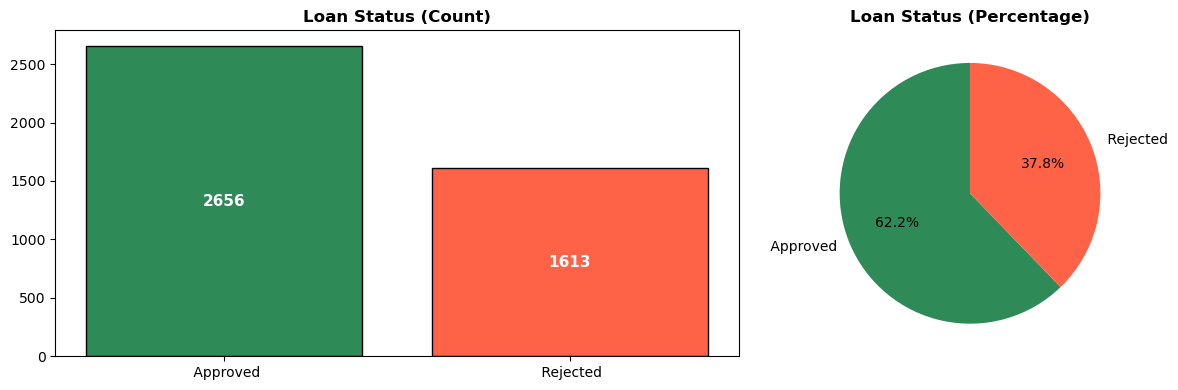

In [12]:
plot_bar_pie(df, "loan_status")

> **Note:** Data is mildly imbalanced (62% vs 38%).  
> I will use **Stratified Split** to keep this ratio in train and test sets.


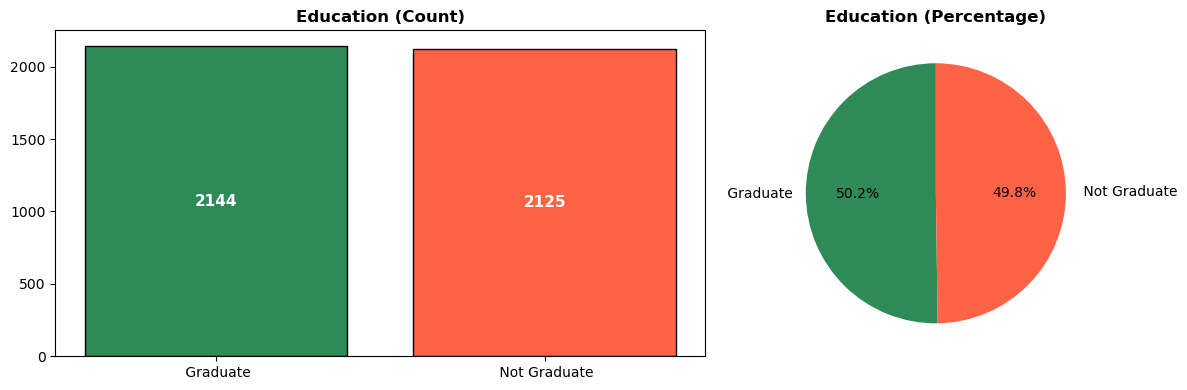

In [13]:
plot_bar_pie(df, "education")

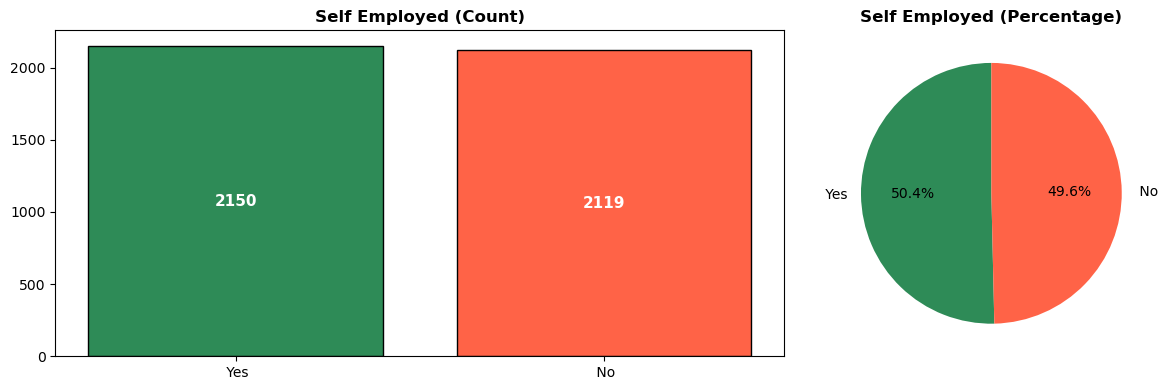

In [14]:
plot_bar_pie(df, "self_employed")

### Loan Status by Number of Dependents

Stacked bar chart illustrating the distribution of loan status across different numbers of dependents. Counts are displayed within each segment.


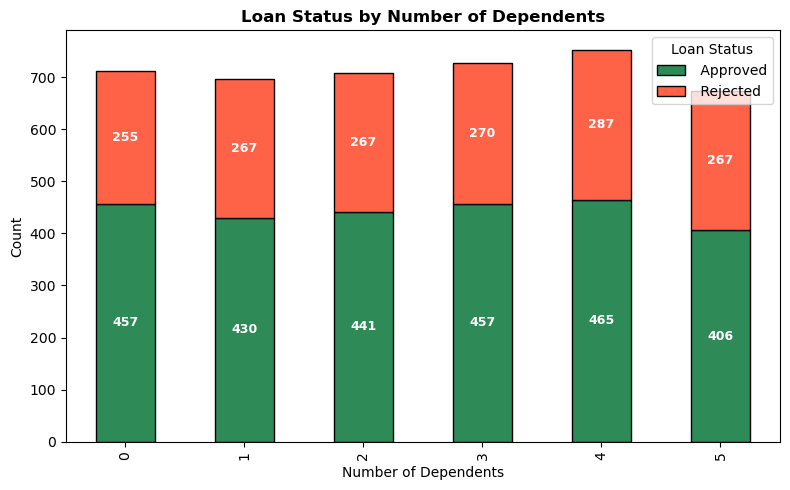

In [15]:
# Crosstab: dependents × loan status
ct = pd.crosstab(df["no_of_dependents"], df["loan_status"])

# Plot stacked bar chart
ax = ct.plot(kind="bar", stacked=True, figsize=(8,5),color=["seagreen","tomato"], edgecolor="black")

# Add labels
for container in ax.containers:
    ax.bar_label(container, label_type="center",color="white", fontsize=9, fontweight="bold")

# ----- #
ax.set_title("Loan Status by Number of Dependents", fontweight="bold")
ax.set_xlabel("Number of Dependents")
ax.set_ylabel("Count")
plt.legend(title="Loan Status")
plt.tight_layout()
plt.show()

### Numerical Features Exploration  
- Histograms + KDE to check distribution  
- Boxplots to detect outliers  
- Monetary values shown in **Millions ($M)** for readability  


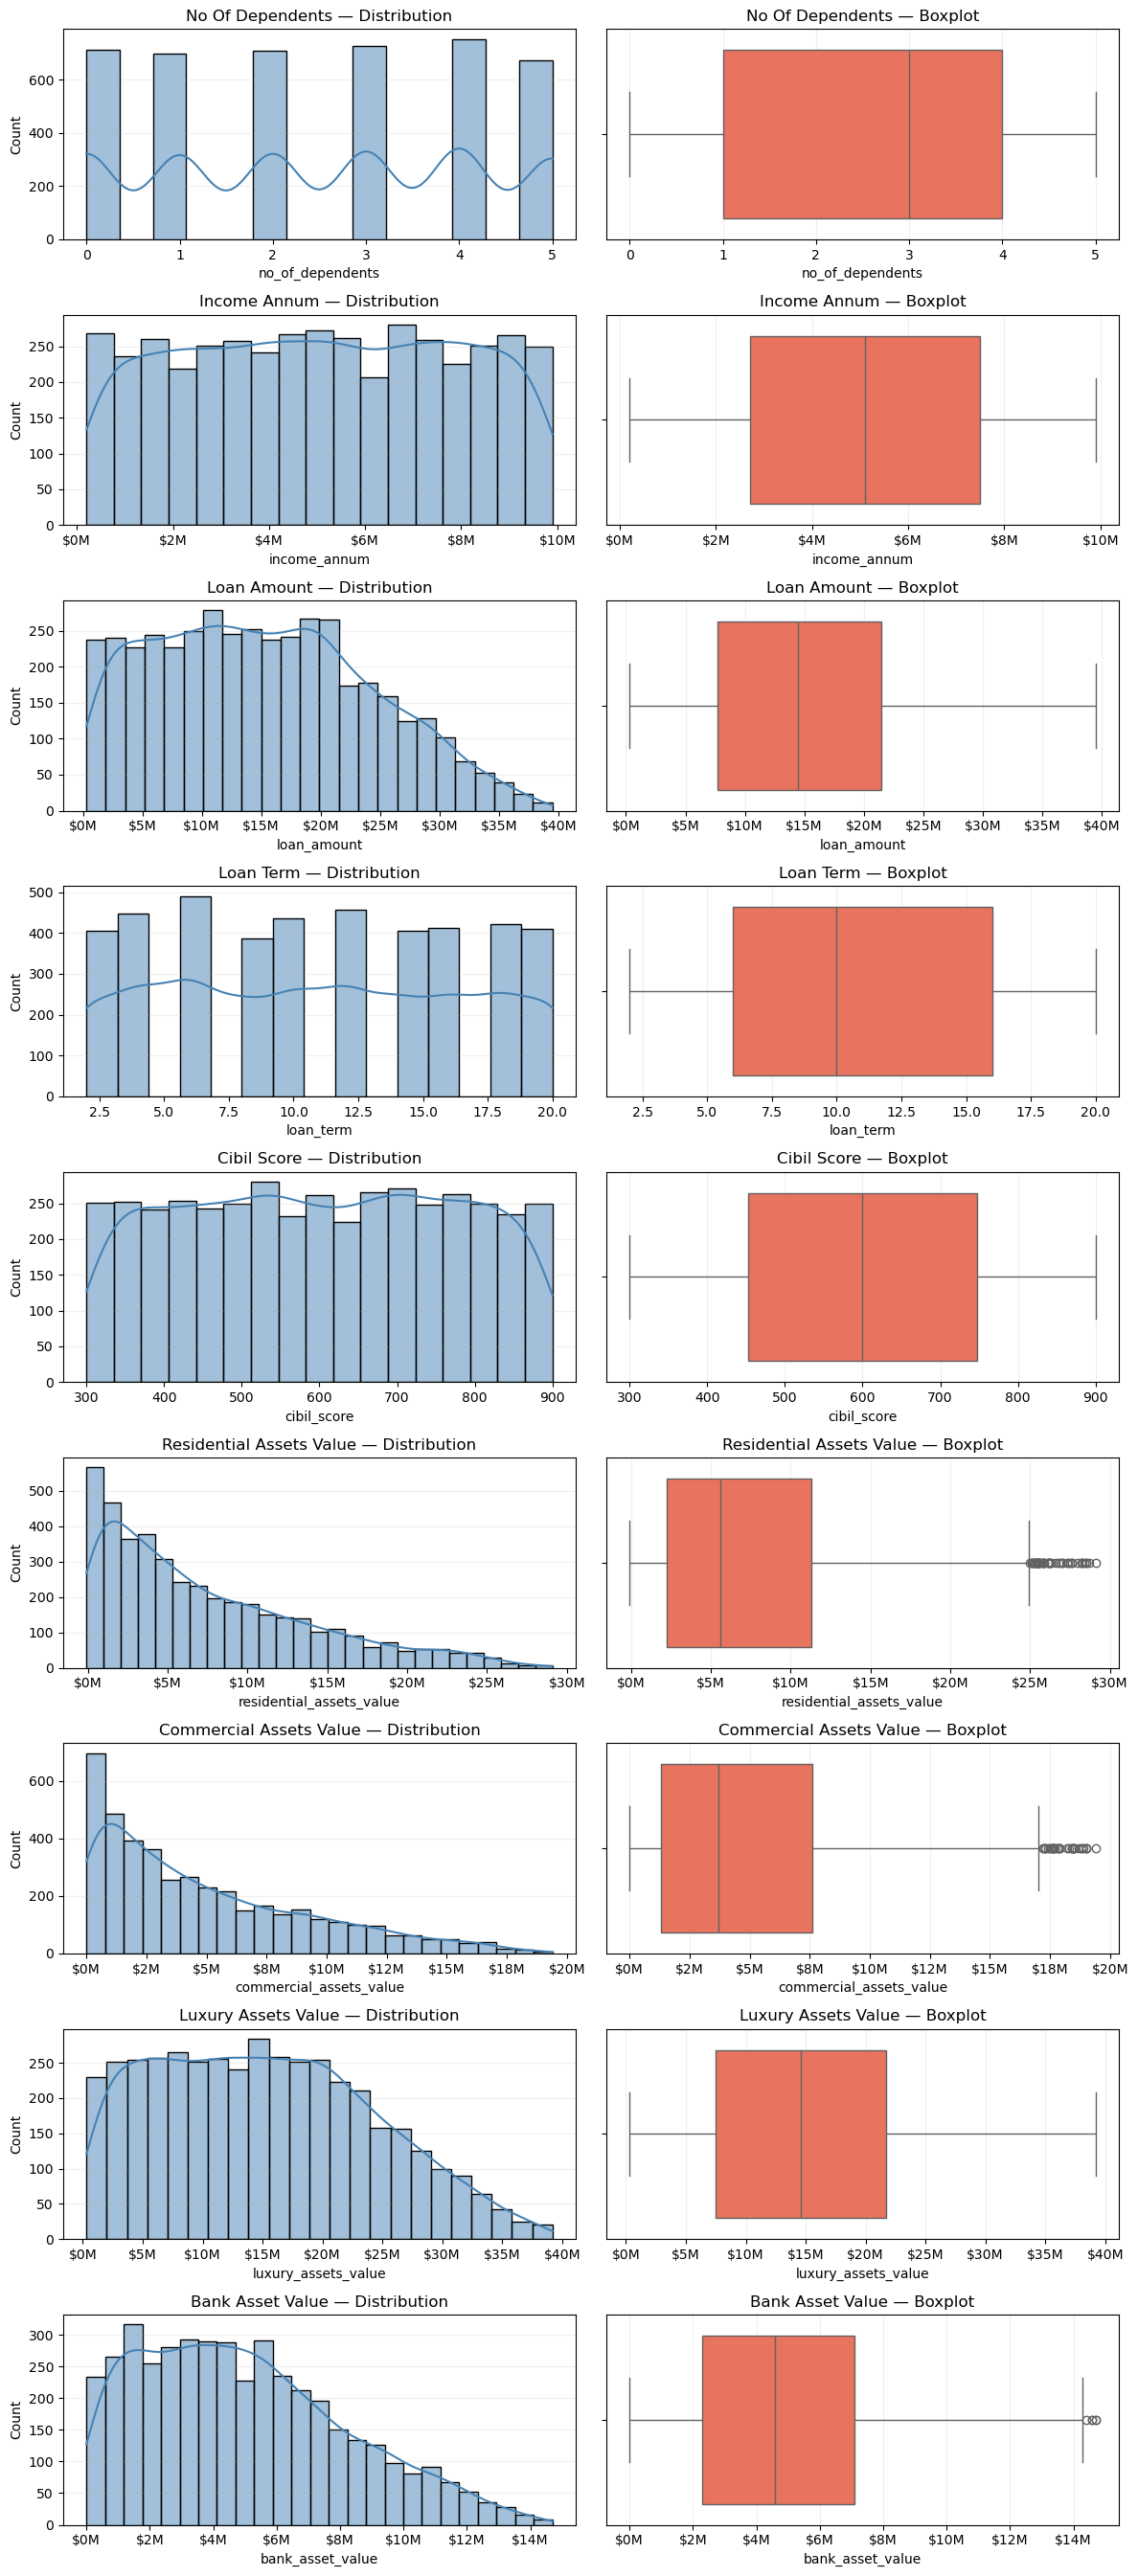

In [16]:
fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, len(num_cols)*3))

# money-like columns
money_cols = ["income_annum", "loan_amount", "residential_assets_value","commercial_assets_value", "luxury_assets_value", "bank_asset_value"]

# fixed formatter: always show in Millions
money_fmt = mtick.FuncFormatter(lambda x, _: f"${x/1e6:,.0f}M")

for i, col in enumerate(num_cols):
    pretty_name = col.replace("_", " ").title()

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color="steelblue")
    axes[i, 0].set_title(f"{pretty_name} — Distribution")
    axes[i, 0].grid(axis='y', alpha=0.2)


    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1], color="tomato")
    axes[i, 1].set_title(f"{pretty_name} — Boxplot")
    axes[i, 1].grid(axis='x', alpha=0.2)

    # apply $M format for money columns
    if col in money_cols:
        axes[i, 0].xaxis.set_major_formatter(money_fmt)
        axes[i, 1].xaxis.set_major_formatter(money_fmt)

plt.tight_layout()
plt.show()

### IQR-Based Outlier Removal

We define a helper function `iqr_clip_mask` that removes outliers using the **Interquartile Range (IQR)** rule with a tunable multiplier *k*.  
The function returns both the cleaned DataFrame and a boolean mask of kept rows.

In [17]:
def iqr_clip_mask(df, cols, k=1.5):
    mask = pd.Series(True, index=df.index)
    for c in cols:
        q1, q3 = df[c].quantile([0.25, 0.75])
        lo, hi = q1 - k*(q3-q1), q3 + k*(q3-q1)
        mask &= df[c].between(lo, hi)
    return df[mask].copy(), mask

df_clean, keep_mask = iqr_clip_mask(df, num_cols,k=1.5)
print(f"Before: {df.shape}  |  After: {df_clean.shape}  |  Removed: {(~keep_mask).sum()}")

Before: (4269, 12)  |  After: (4178, 12)  |  Removed: 91


### Feature–Target Relationship Analysis  

- **Income & Loan Amount**: Wide overlap → weak individual predictors.  
- **CIBIL Score**: Strong separation → most powerful predictor of approval.  
- **Education & Employment**: Balanced distribution → marginal impact.  

**Key Insight:**  
`CIBIL Score` drives loan approval prediction, while other features only add value in combination.


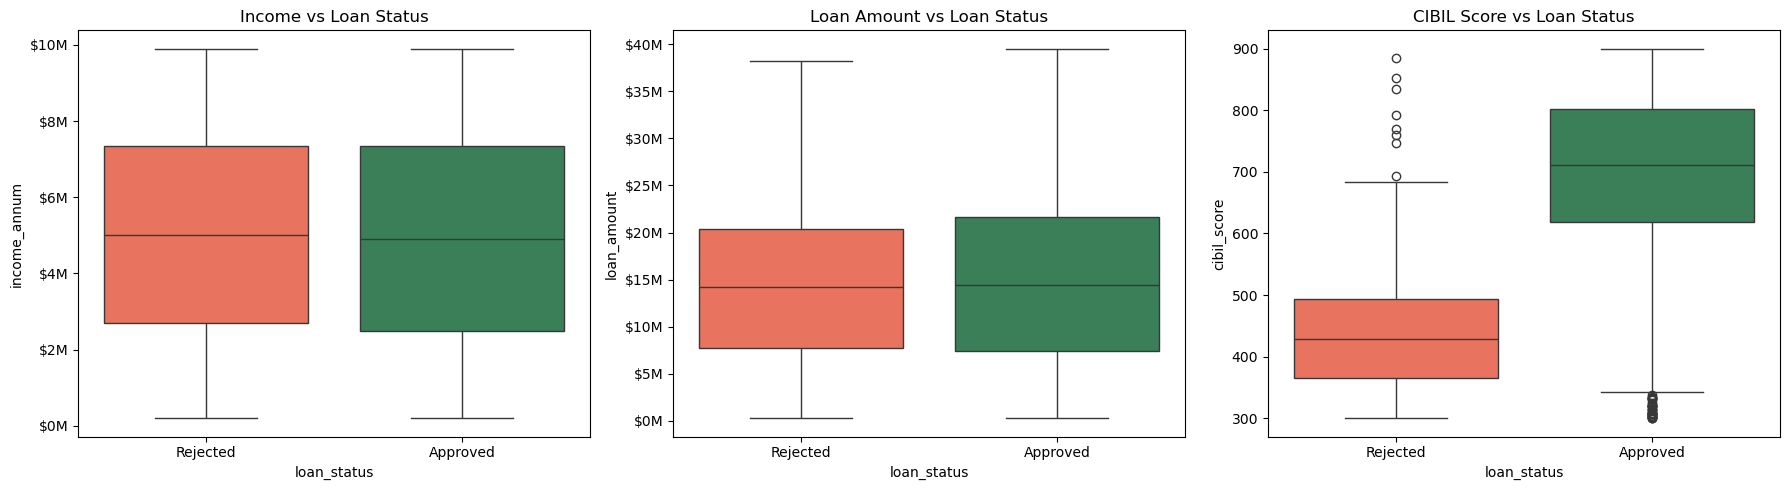

In [18]:
df_clean["loan_status"] = df_clean["loan_status"].str.strip()
# Define colors
palette = {"Approved": "seagreen", "Rejected": "tomato"}

# Boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x="loan_status", y="income_annum", hue="loan_status",data=df_clean, ax=axes[0], palette=palette, legend=False)
axes[0].set_title("Income vs Loan Status")
axes[0].yaxis.set_major_formatter(money_fmt)

sns.boxplot(x="loan_status", y="loan_amount", hue="loan_status",data=df_clean, ax=axes[1], palette=palette, legend=False)
axes[1].set_title("Loan Amount vs Loan Status")
axes[1].yaxis.set_major_formatter(money_fmt)

sns.boxplot(x="loan_status", y="cibil_score", hue="loan_status",data=df_clean, ax=axes[2], palette=palette, legend=False)
axes[2].set_title("CIBIL Score vs Loan Status")

plt.tight_layout()
plt.show()


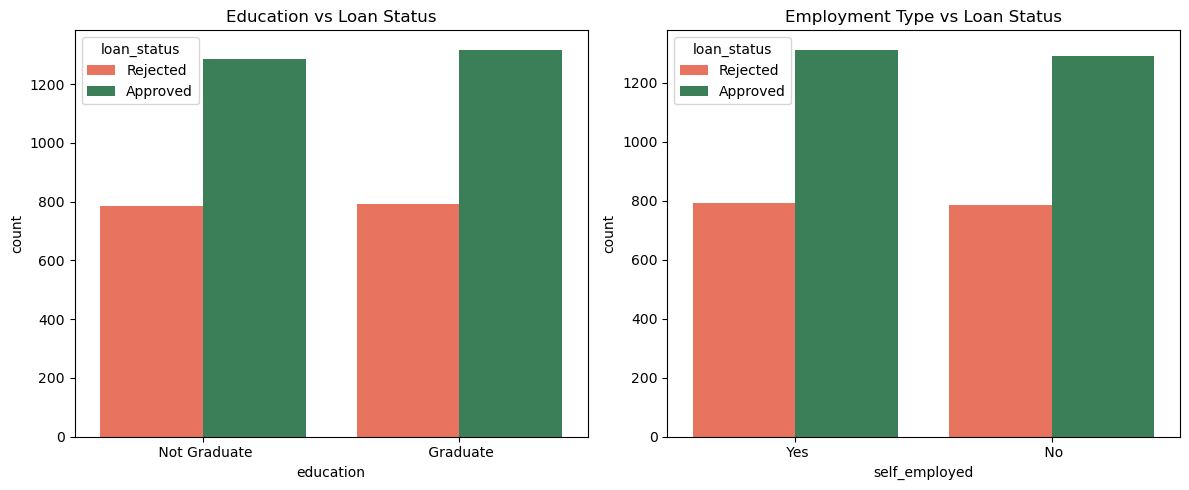

In [19]:
# Countplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Education vs Loan Status
sns.countplot(x="education", hue="loan_status",data=df_clean, ax=axes[0], palette=palette)
axes[0].set_title("Education vs Loan Status")

# Employment Type vs Loan Status
sns.countplot(x="self_employed", hue="loan_status",data=df_clean, ax=axes[1], palette=palette)
axes[1].set_title("Employment Type vs Loan Status")

plt.tight_layout()
plt.show()

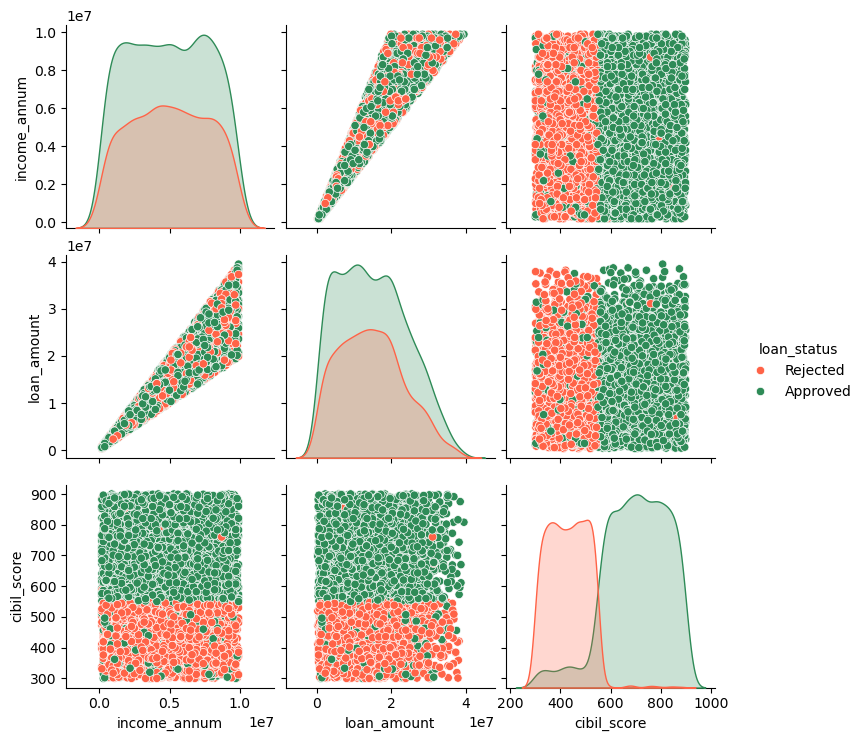

In [20]:
sns.pairplot(df_clean, vars=["income_annum", "loan_amount", "cibil_score"],hue="loan_status", palette=palette)
plt.show()

### Encoding 

- **Encode target (`loan_status`)**:  
  - `Rejected → 0`  
  - `Approved → 1`

- **One-Hot Encode categorical variables**:  
  - `education`  
  - `self_employed` 


In [21]:
# Copy  
df_final = df_clean.copy()

# Encode target
df_final['loan_status'] = df_final['loan_status'].map({'Rejected': 0, 'Approved': 1}).astype(int)

# One-Hot Encoding for categorical vars
cat_cols = ['education', 'self_employed']
df_final = pd.get_dummies(df_final, columns=cat_cols, drop_first=True, dtype=int)

df_final.sample(5)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
1107,5,4800000,10300000,8,781,4800000,6800000,11100000,4300000,1,0,1
2783,5,3400000,11300000,20,871,6500000,3900000,9700000,2400000,1,0,1
3243,1,8800000,30200000,18,897,17100000,7900000,28700000,11100000,1,1,0
2993,0,3700000,9300000,14,531,8300000,1000000,8900000,1900000,0,1,1
3235,4,5500000,11600000,12,474,1800000,2400000,20100000,5600000,0,0,0


## Multivariate Analysis  

- **Correlation (Pearson & Spearman):** CIBIL Score shows the strongest relationship with `loan_status`. Income, loan amount, and asset values are highly correlated with each other, indicating possible redundancy.  
- **Mutual Information (MI):** Confirms CIBIL Score as the most predictive feature; other variables add incremental value only in combination.  
- **Point-Biserial:** Reaffirms the dominance of CIBIL Score, while individual effects of other features remain weak.  

**Takeaway:** Creditworthiness (**CIBIL Score**) is the primary driver of loan outcomes. Financial variables provide supportive signals when combined but are not strong standalone predictors.  


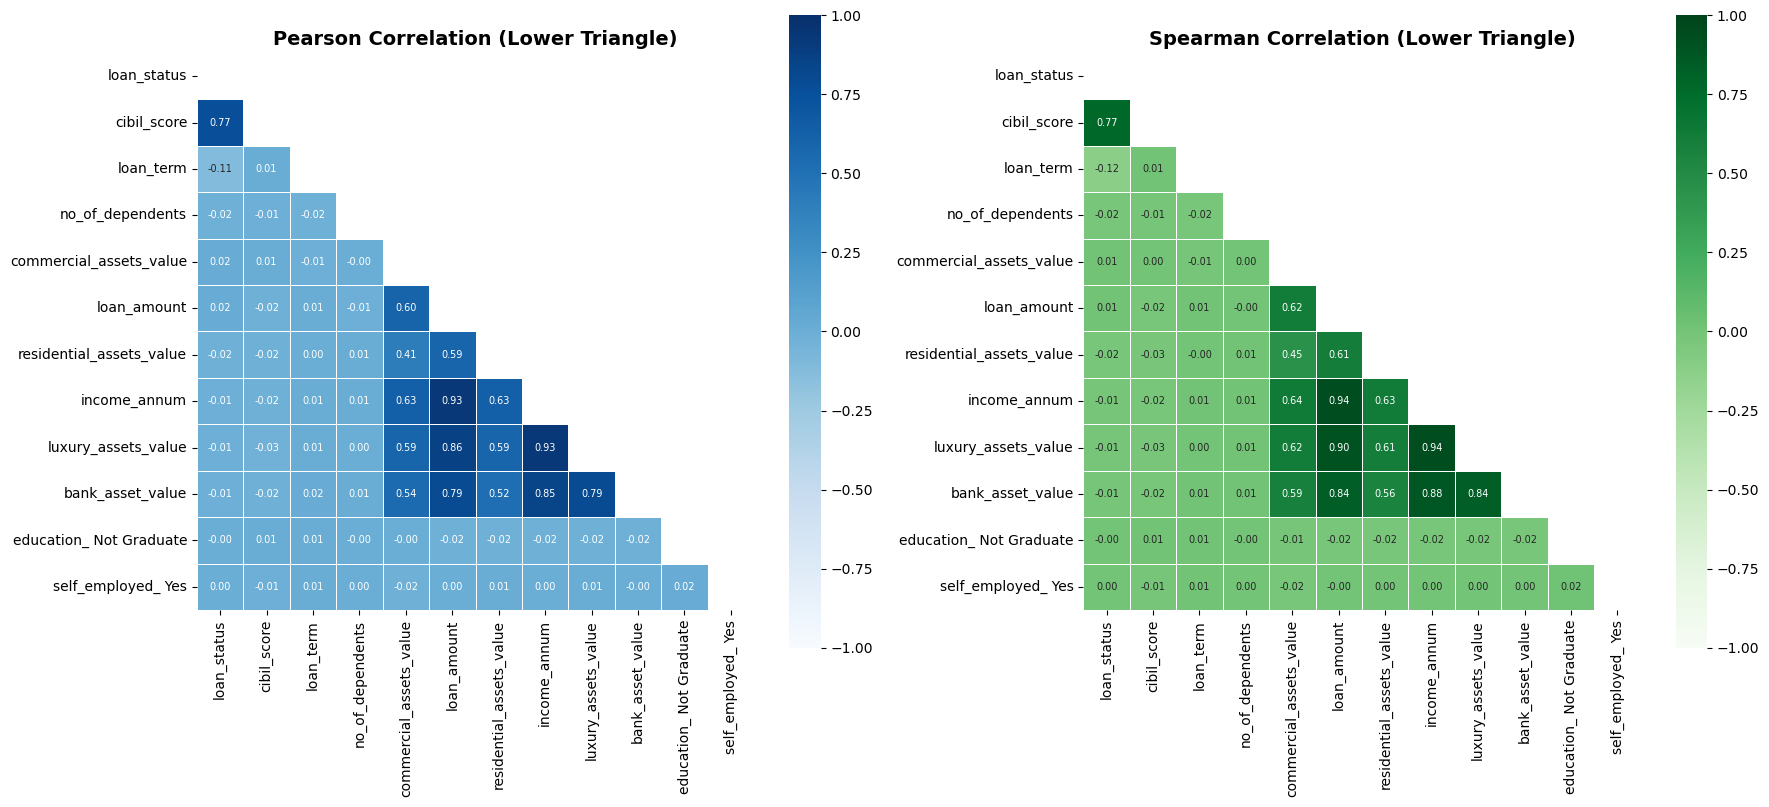

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute
corr_p = df_final.corr(method="pearson").round(2)
corr_s = df_final.corr(method="spearman").round(2)

# Order columns by absolute correlation with target
order = corr_p['loan_status'].abs().sort_values(ascending=False).index
corr_p = corr_p.loc[order, order]
corr_s = corr_s.loc[order, order]

# Lower-triangle mask
mask = np.triu(np.ones_like(corr_p, dtype=bool))

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.heatmap(corr_p, mask=mask, annot=True, fmt=".2f", cmap="Blues", vmin=-1, vmax=1,square=True, cbar=True, linewidths=.5, annot_kws={"size":7}, ax=axes[0])
axes[0].set_title("Pearson Correlation (Lower Triangle)", fontsize=14, fontweight="bold")

sns.heatmap(corr_s, mask=mask, annot=True, fmt=".2f", cmap="Greens", vmin=-1, vmax=1,square=True, cbar=True, linewidths=.5, annot_kws={"size":7}, ax=axes[1])
axes[1].set_title("Spearman Correlation (Lower Triangle)", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

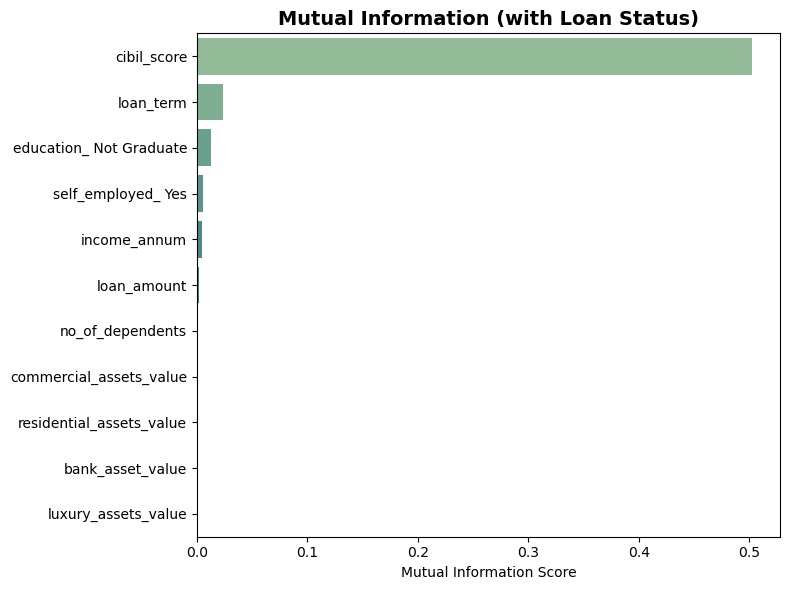

In [23]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = df_final.drop("loan_status", axis=1)
y = df_final["loan_status"]

# MI calculation
mi = mutual_info_classif(X, y, discrete_features="auto", random_state=42)

mi_df = pd.DataFrame({"Feature": X.columns, "MI Score": mi}).sort_values("MI Score", ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=mi_df, x="MI Score", y="Feature", hue="Feature", palette="crest", legend=False)
plt.title("Mutual Information (with Loan Status)", fontsize=14, fontweight="bold")
plt.xlabel("Mutual Information Score")
plt.ylabel("")
plt.tight_layout()
plt.show()


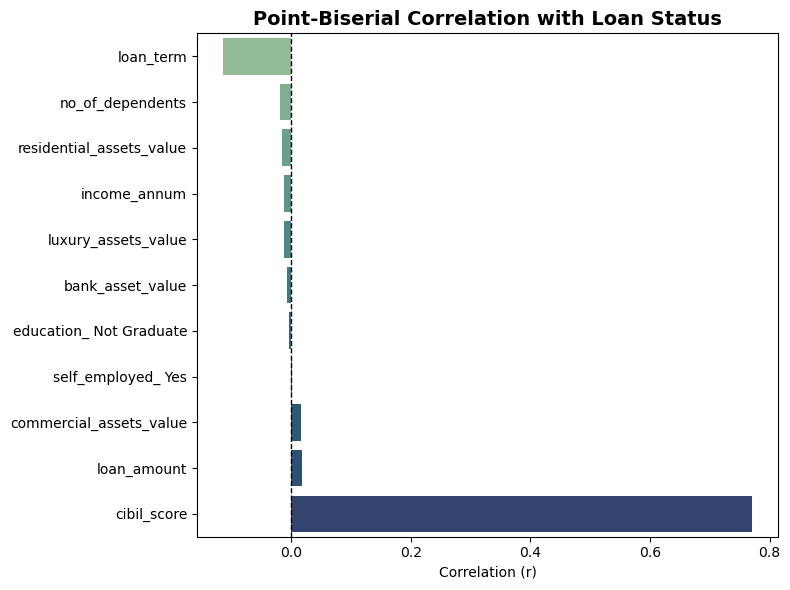

In [24]:
from scipy.stats import pointbiserialr
import numpy as np

target = df_final["loan_status"]
pbs_results = []

for col in X.columns:
    if np.issubdtype(df_final[col].dtype, np.number):
        r, _ = pointbiserialr(target, df_final[col])
        pbs_results.append((col, r))

pbs_df = pd.DataFrame(pbs_results, columns=["Feature", "Correlation"]).sort_values("Correlation")

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=pbs_df, x="Correlation", y="Feature", hue="Feature", palette="crest", legend=False)
plt.axvline(0, color="black", linestyle="--", lw=1)
plt.title("Point-Biserial Correlation with Loan Status", fontsize=14, fontweight="bold")
plt.xlabel("Correlation (r)")
plt.ylabel("")
plt.tight_layout()
plt.show()


## Data Splitting

- 80% train / 20% test.  
- Saved as CSV.  
- Reloaded and separated **X** (features) and **y** (target).


In [25]:
from sklearn.model_selection import train_test_split

X = df_final.drop("loan_status", axis=1)
y = df_final["loan_status"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
train_set = pd.concat([X_train, y_train], axis=1)
test_set  = pd.concat([X_test, y_test], axis=1)

train_set.to_csv("train_data_loan_approval.csv", index=False)
test_set.to_csv("test_data_loan_approval.csv", index=False)

print(f"Training and testing datasets have been successfully saved:\n"
      f" - train_data_loan_approval.csv ({train_set.shape[0]} rows, {train_set.shape[1]} columns)\n"
      f" - test_data_loan_approval.csv ({test_set.shape[0]} rows, {test_set.shape[1]} columns)")

Training and testing datasets have been successfully saved:
 - train_data_loan_approval.csv (3342 rows, 12 columns)
 - test_data_loan_approval.csv (836 rows, 12 columns)


In [27]:
train_path = "train_data_loan_approval.csv"
test_path  = "test_data_loan_approval.csv"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

In [28]:
target_col = "loan_status"

# Features & Target
X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col].copy()

X_test  = test_df.drop(columns=[target_col])
y_test  = test_df[target_col].copy()

# Modeling

In [29]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Preprocessing & Pipelines
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Metrics
from sklearn.metrics import (classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score)

## Logistic Regression Model

A Logistic Regression classifier was developed with standardized features and balanced class weights.  
Model evaluation was conducted using the confusion matrix, ROC-AUC, average precision, and coefficient analysis.

- **ROC-AUC:** 0.959  
- **Average Precision (AP):** 0.975  


In [30]:
log_reg_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42))
])

In [31]:
log_reg_pipe.fit(X_train, y_train)

y_pred  = log_reg_pipe.predict(X_test)
y_proba = log_reg_pipe.predict_proba(X_test)[:, 1]  

              precision    recall  f1-score   support

    Rejected       0.83      0.94      0.89       315
    Approved       0.96      0.89      0.92       521

    accuracy                           0.91       836
   macro avg       0.90      0.91      0.90       836
weighted avg       0.91      0.91      0.91       836



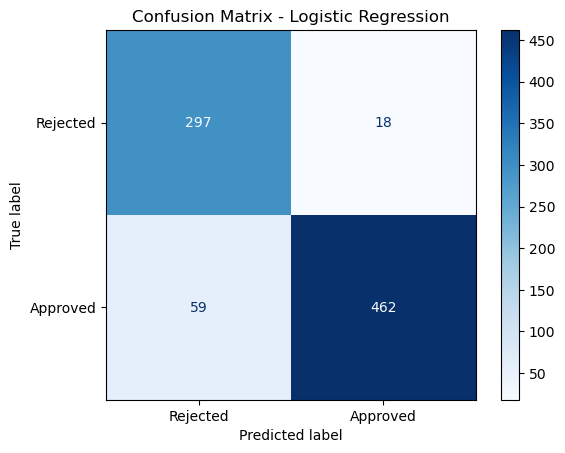

In [32]:
print(classification_report(y_test, y_pred, target_names=["Rejected","Approved"]))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Rejected","Approved"], cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

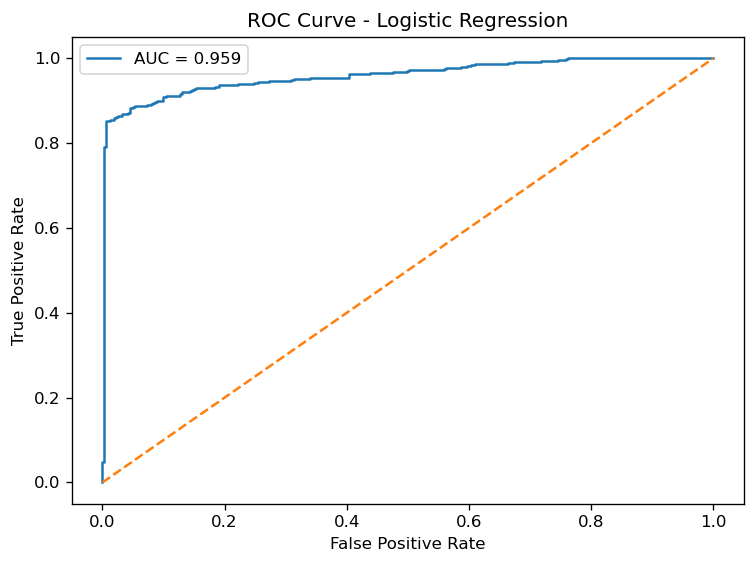

In [33]:
fpr, tpr, thr = roc_curve(y_test, y_proba)
auc_val = roc_auc_score(y_test, y_proba)

plt.figure(dpi=120)
plt.plot(fpr, tpr, label=f"AUC = {auc_val:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()

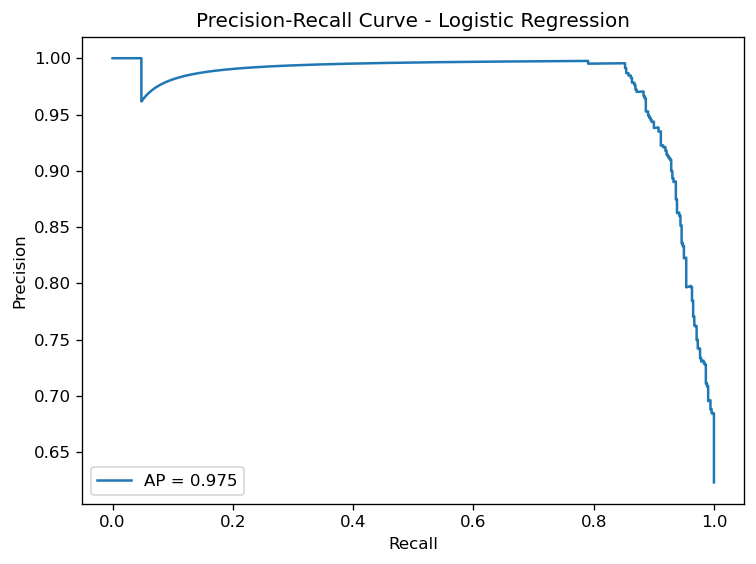

In [34]:
precision, recall, thr_pr = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(dpi=120)
plt.plot(recall, precision, label=f"AP = {ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()

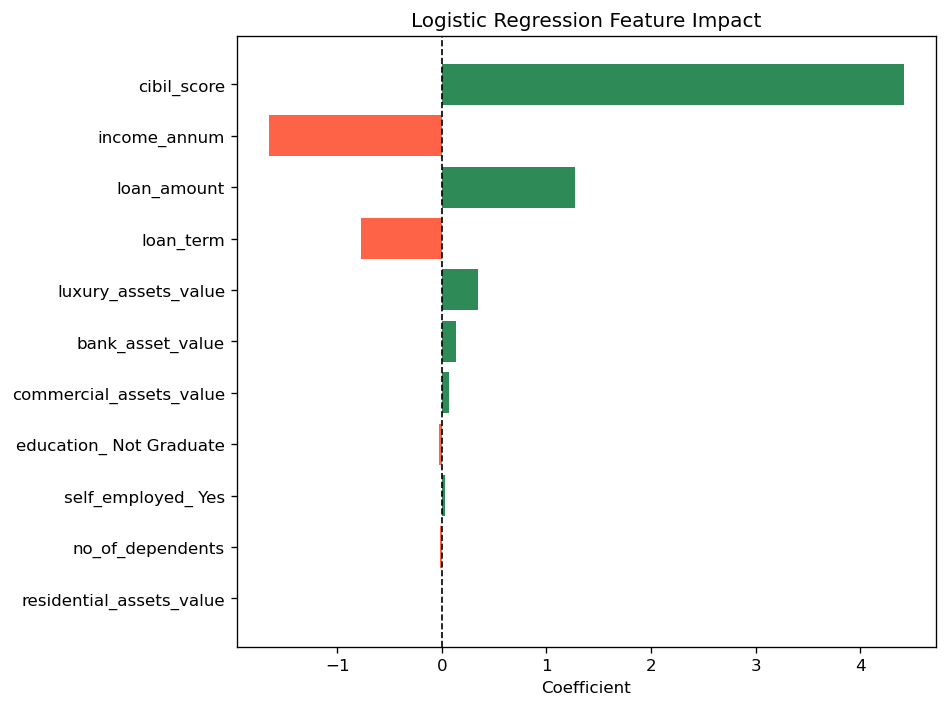

In [35]:
coefs = log_reg_pipe.named_steps["clf"].coef_.ravel()
coef_df = pd.DataFrame({"Feature": X_train.columns, "Coef": coefs}).sort_values("Coef", key=np.abs, ascending=False)

plt.figure(figsize=(8,6), dpi=120)
colors = coef_df["Coef"].apply(lambda x: "seagreen" if x > 0 else "tomato")

plt.barh(coef_df["Feature"], coef_df["Coef"], color=colors)
plt.axvline(0, color="k", linestyle="--", linewidth=1)
plt.gca().invert_yaxis()
plt.xlabel("Coefficient")
plt.title("Logistic Regression Feature Impact")
plt.tight_layout()
plt.show()

In [36]:
print(f"AUC: {auc_val:.3f}")
print(f"Average Precision: {ap:.3f}")

AUC: 0.959
Average Precision: 0.975


### With SMOTE

To address potential class imbalance, SMOTE (Synthetic Minority Oversampling Technique) was applied on the training set.  
Results were consistent with the baseline, showing a slight improvement in recall for the *Approved* class.

- **ROC-AUC (SMOTE):** 0.958  
- **Average Precision (AP, SMOTE):** 0.976  

In [37]:
log_reg_pipe_smote = ImbPipeline(steps=[
    ("smote", SMOTE(sampling_strategy="auto", k_neighbors=5, random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42))
])

In [38]:
log_reg_pipe_smote.fit(X_train, y_train)

y_pred_sm  = log_reg_pipe_smote.predict(X_test)
y_proba_sm = log_reg_pipe_smote.predict_proba(X_test)[:, 1]

Classification Report (SMOTE):
               precision    recall  f1-score   support

    Rejected       0.84      0.92      0.88       315
    Approved       0.95      0.90      0.92       521

    accuracy                           0.90       836
   macro avg       0.89      0.91      0.90       836
weighted avg       0.91      0.90      0.91       836



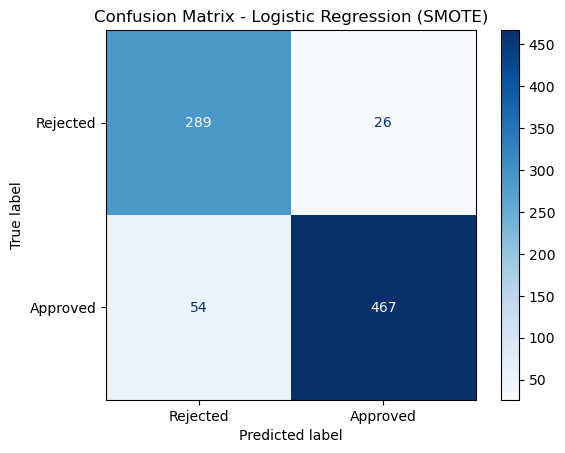

In [39]:
print("Classification Report (SMOTE):\n",classification_report(y_test, y_pred_sm, target_names=["Rejected","Approved"]))

ConfusionMatrixDisplay.from_predictions( y_test, y_pred_sm, display_labels=["Rejected","Approved"], cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (SMOTE)")
plt.show()

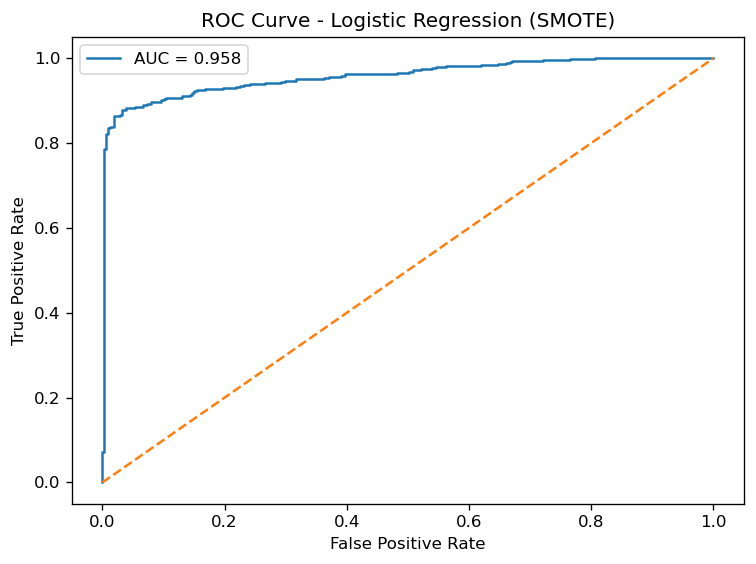

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_proba_sm)
auc_val = roc_auc_score(y_test, y_proba_sm)
plt.figure(dpi=120)
plt.plot(fpr, tpr, label=f"AUC = {auc_val:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (SMOTE)")
plt.legend(); plt.tight_layout(); plt.show()

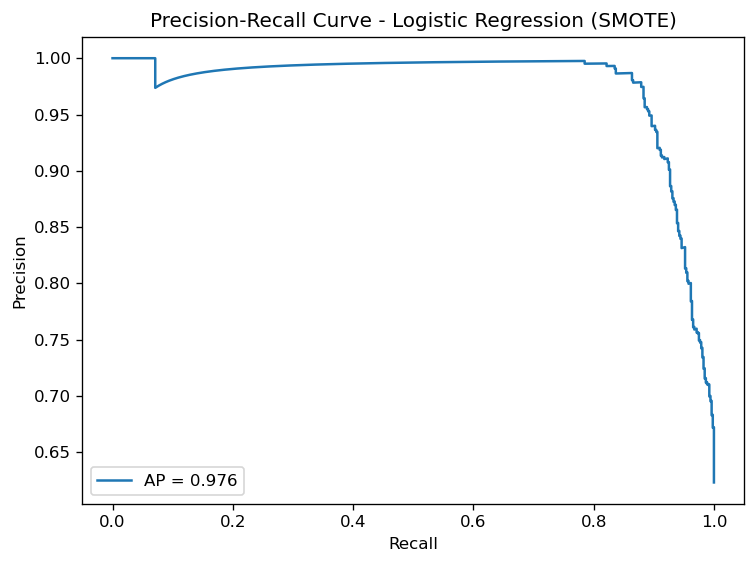

In [41]:
precision, recall, _ = precision_recall_curve(y_test, y_proba_sm)
ap = average_precision_score(y_test, y_proba_sm)
plt.figure(dpi=120)
plt.plot(recall, precision, label=f"AP = {ap:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression (SMOTE)")
plt.legend(); plt.tight_layout(); plt.show()

---

## Decision Tree Classifier

The **Decision Tree** model was trained to predict loan approval.  
- **Baseline performance:** high accuracy and strong separation between classes.  
- This served as the **reference model** before tuning.


In [42]:
dt_clf = DecisionTreeClassifier(
    max_depth=6,            
    min_samples_split=20,  
    min_samples_leaf=8,    
    random_state=42,
    class_weight="balanced" 
)

In [43]:
dt_clf.fit(X_train, y_train)

y_pred_dt  = dt_clf.predict(X_test)
y_proba_dt = dt_clf.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

    Rejected       0.90      1.00      0.95       315
    Approved       1.00      0.93      0.96       521

    accuracy                           0.96       836
   macro avg       0.95      0.96      0.96       836
weighted avg       0.96      0.96      0.96       836



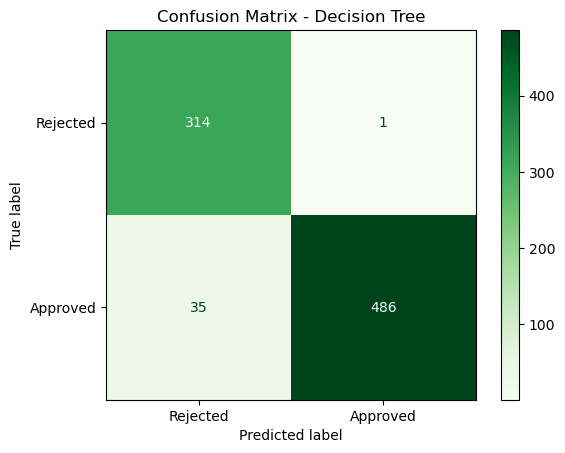

In [44]:
print(classification_report(y_test, y_pred_dt, target_names=["Rejected","Approved"]))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, display_labels=["Rejected","Approved"], cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

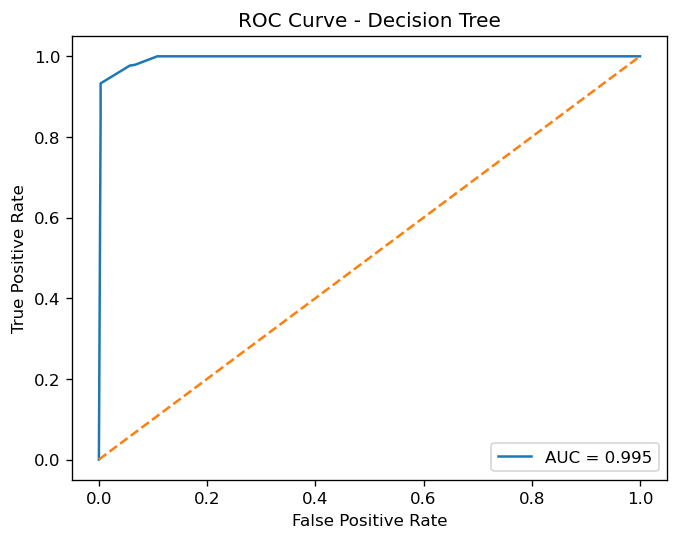

In [45]:
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
auc_val = roc_auc_score(y_test, y_proba_dt)

plt.figure(dpi=120)
plt.plot(fpr, tpr, label=f"AUC = {auc_val:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(); plt.show()


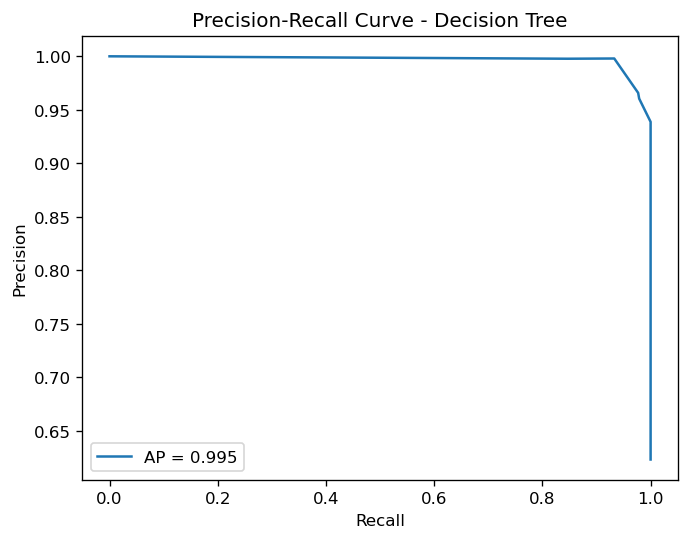

In [46]:
precision, recall, _ = precision_recall_curve(y_test, y_proba_dt)
ap = average_precision_score(y_test, y_proba_dt)

plt.figure(dpi=120)
plt.plot(recall, precision, label=f"AP = {ap:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Decision Tree")
plt.legend(); plt.show()

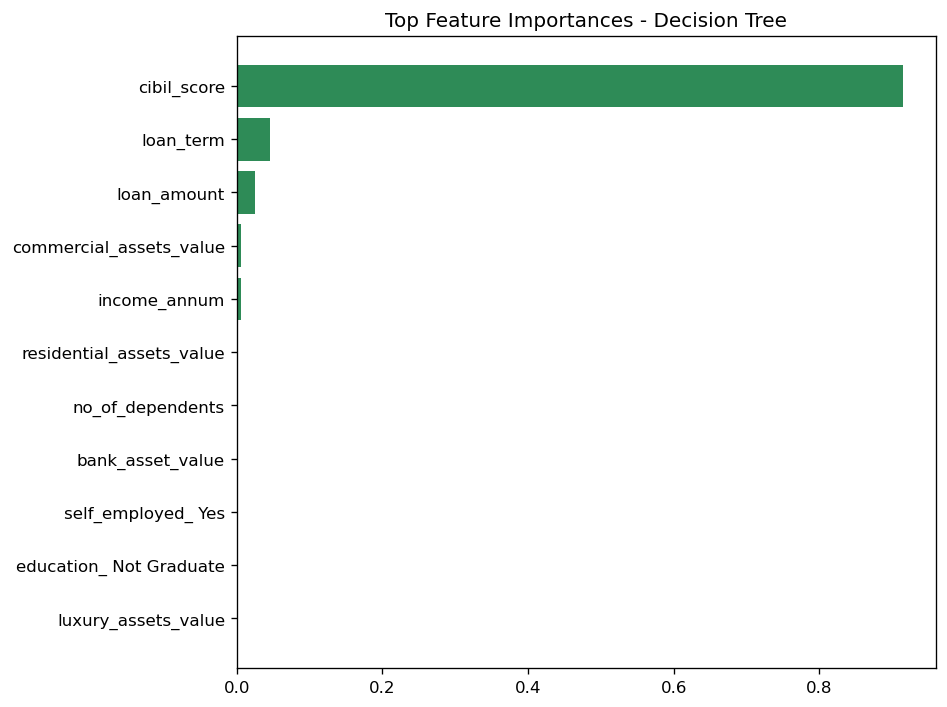

In [47]:
fi = pd.DataFrame({"Feature": X_train.columns,"Importance": dt_clf.feature_importances_}).sort_values("Importance", ascending=True)

plt.figure(figsize=(8,6), dpi=120)
plt.barh(fi["Feature"], fi["Importance"], color="seagreen")
plt.title("Top Feature Importances - Decision Tree")
plt.tight_layout(); plt.show()


### Hyperparameter Tuning

Applied **GridSearchCV with StratifiedKFold** to optimize:  
- **Tree depth**  
- **Split rules**  
- **Pruning parameter (ccp_alpha)**  

**Result:** Slightly lower accuracy compared to the baseline, but improved **generalization** and **model stability**.



In [48]:
param_grid = {
    "max_depth": [3, 5, 7, 9, 12, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"],
    "class_weight": [None, "balanced"],
    "ccp_alpha": [0.0, 0.001, 0.005, 0.01],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeClassifier(random_state=42)

gs = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring={"auc": "roc_auc", "f1": "f1", "ap": "average_precision"},
    refit="auc",
    cv=cv,
    n_jobs=-1,
    verbose=0
)

gs.fit(X_train, y_train)
best_dt = gs.best_estimator_

print("Best params:", gs.best_params_)
print("Best CV AUC:", f"{gs.best_score_:.3f}")
print("Depth:", best_dt.get_depth(), "| Leaves:", best_dt.get_n_leaves())


Best params: {'ccp_alpha': 0.0, 'class_weight': None, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CV AUC: 0.996
Depth: 3 | Leaves: 7


=== Test Metrics ===
              precision    recall  f1-score   support

    Rejected       0.89      0.99      0.94       315
    Approved       0.99      0.93      0.96       521

    accuracy                           0.95       836
   macro avg       0.94      0.96      0.95       836
weighted avg       0.95      0.95      0.95       836

ROC-AUC: 0.994 | AP: 0.994


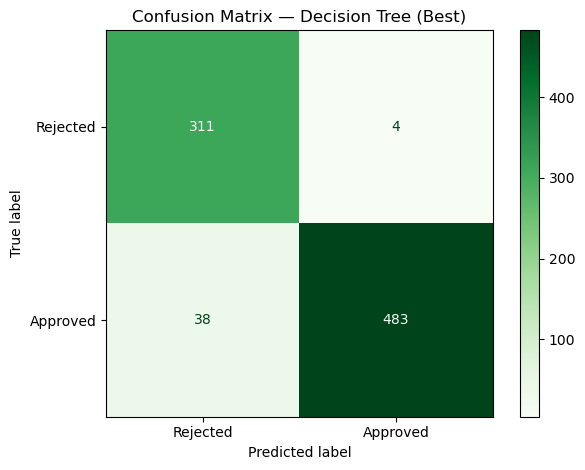

In [49]:
y_pred  = best_dt.predict(X_test)
y_proba = best_dt.predict_proba(X_test)[:, 1]

print("=== Test Metrics ===")
print(classification_report(y_test, y_pred, target_names=["Rejected","Approved"]))
test_auc = roc_auc_score(y_test, y_proba)
test_ap  = average_precision_score(y_test, y_proba)
print(f"ROC-AUC: {test_auc:.3f} | AP: {test_ap:.3f}")

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=["Rejected","Approved"], cmap="Greens"
)
plt.title("Confusion Matrix — Decision Tree (Best)")
plt.tight_layout(); plt.show()

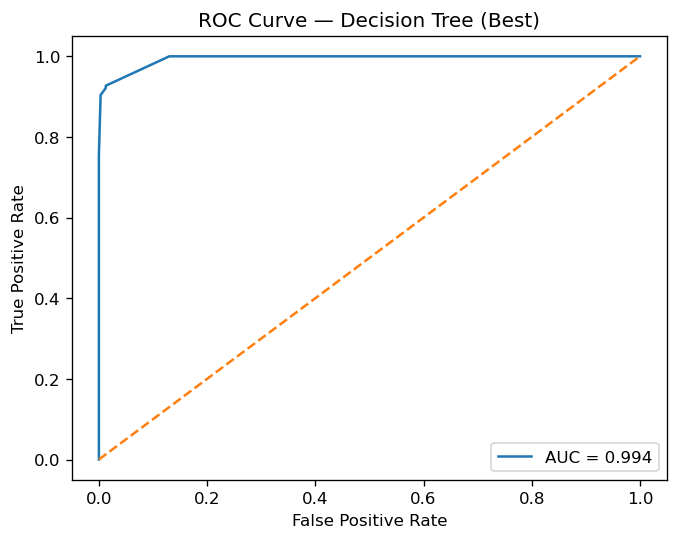

In [50]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(dpi=120)
plt.plot(fpr, tpr, label=f"AUC = {test_auc:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Decision Tree (Best)")
plt.legend()
plt.show()

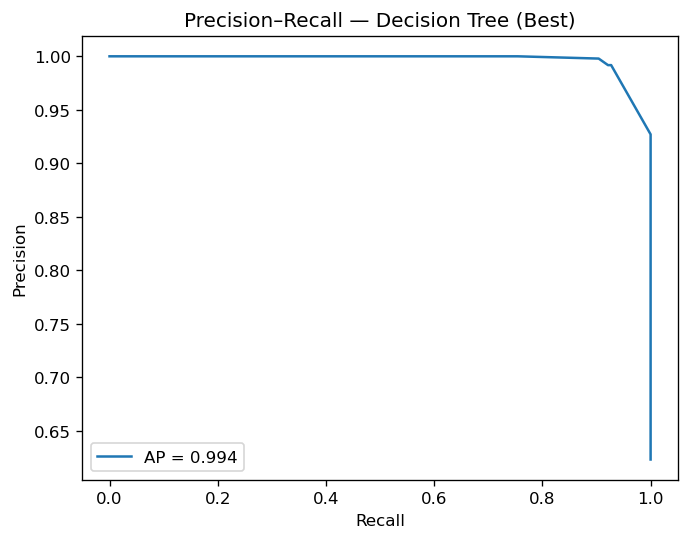

In [51]:
prec, rec, _ = precision_recall_curve(y_test, y_proba)
plt.figure(dpi=120)
plt.plot(rec, prec, label=f"AP = {test_ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall — Decision Tree (Best)")
plt.legend()
plt.show()

---
## Random Forest Classifier  

The **Random Forest** model was applied as an ensemble baseline, combining multiple decision trees to enhance stability and accuracy.  
It achieved **AUC = 0.998** and **AP = 0.999**, with strong precision–recall balance across both classes.  

In [52]:
rf_baseline = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=2,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

In [53]:
rf_baseline.fit(X_train, y_train)

y_pred = rf_baseline.predict(X_test)
y_proba = rf_baseline.predict_proba(X_test)[:, 1]

=== Random Forest (Baseline) — Test Metrics ===
              precision    recall  f1-score   support

    Rejected       0.97      0.97      0.97       315
    Approved       0.98      0.98      0.98       521

    accuracy                           0.98       836
   macro avg       0.97      0.98      0.97       836
weighted avg       0.98      0.98      0.98       836

ROC-AUC: 0.998 | AP: 0.999


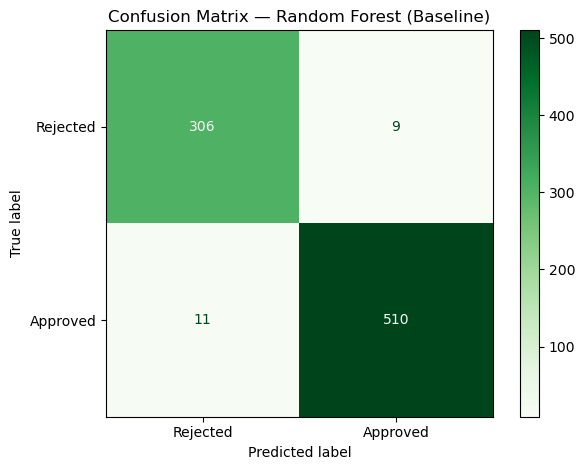

In [54]:
print("=== Random Forest (Baseline) — Test Metrics ===")
print(classification_report(y_test, y_pred, target_names=["Rejected","Approved"]))
auc_val = roc_auc_score(y_test, y_proba)
ap_val  = average_precision_score(y_test, y_proba)
print(f"ROC-AUC: {auc_val:.3f} | AP: {ap_val:.3f}")
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=["Rejected","Approved"], cmap="Greens"
)
plt.title("Confusion Matrix — Random Forest (Baseline)")
plt.tight_layout(); plt.show()

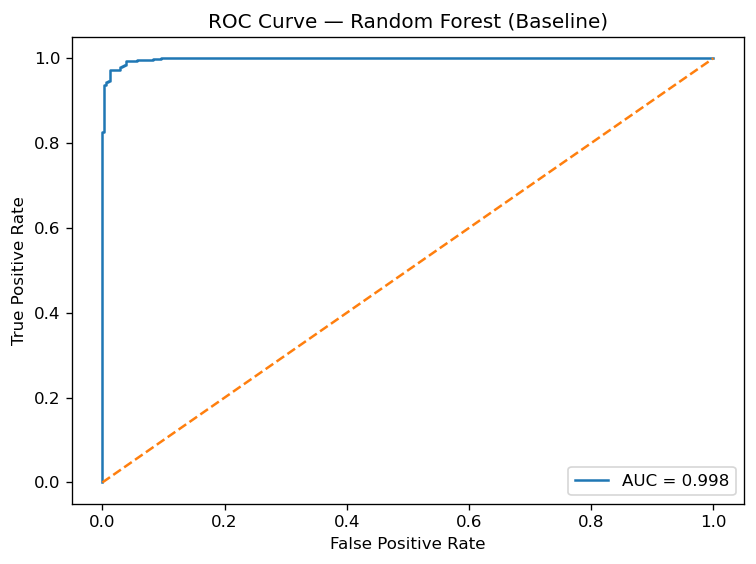

In [55]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(dpi=120)
plt.plot(fpr, tpr, label=f"AUC = {auc_val:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest (Baseline)")
plt.legend(); plt.tight_layout(); plt.show()

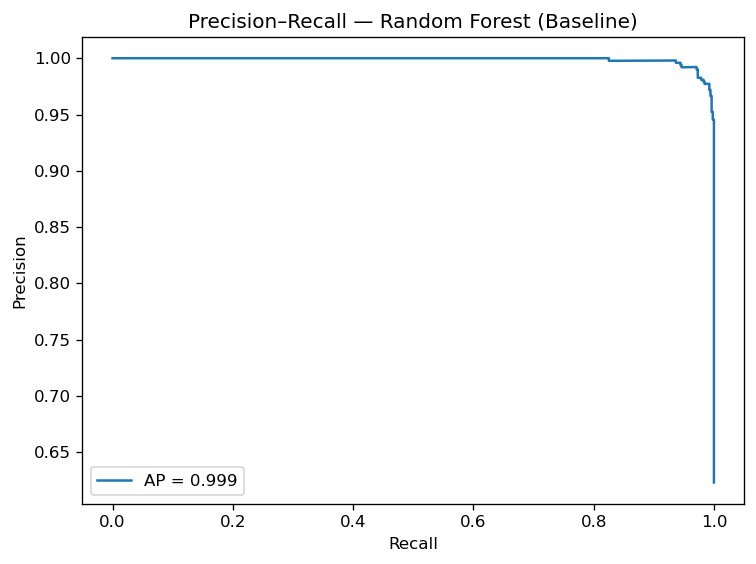

In [56]:
prec, rec, _ = precision_recall_curve(y_test, y_proba)
plt.figure(dpi=120)
plt.plot(rec, prec, label=f"AP = {ap_val:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision–Recall — Random Forest (Baseline)")
plt.legend(); plt.tight_layout(); plt.show()

### Hyperparameter Tuning  

Using **GridSearchCV** with **Stratified K-Fold CV**, key parameters (*n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features*) were optimized.  
The tuned model reached **AUC = 0.999** and **AP = 0.999**, further improving recall while maintaining high precision.  

In [57]:
# CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Search space
param_dist = {
    "n_estimators": [300, 500, 800, 1000],
    "max_depth": [None, 8, 12, 16, 24],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", None],
    "class_weight": [None, "balanced"]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    scoring="roc_auc",
    n_iter=40,
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rs.fit(X_train, y_train)
best_rf = rs.best_estimator_

print("Best params:", rs.best_params_)
print(f"Best CV ROC-AUC: {rs.best_score_:.3f}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 16, 'class_weight': 'balanced'}
Best CV ROC-AUC: 0.998


=== Random Forest (Tuned) — Test Metrics ===
              precision    recall  f1-score   support

    Rejected       0.97      0.98      0.98       315
    Approved       0.99      0.98      0.99       521

    accuracy                           0.98       836
   macro avg       0.98      0.98      0.98       836
weighted avg       0.98      0.98      0.98       836

ROC-AUC: 0.999 | AP: 0.999


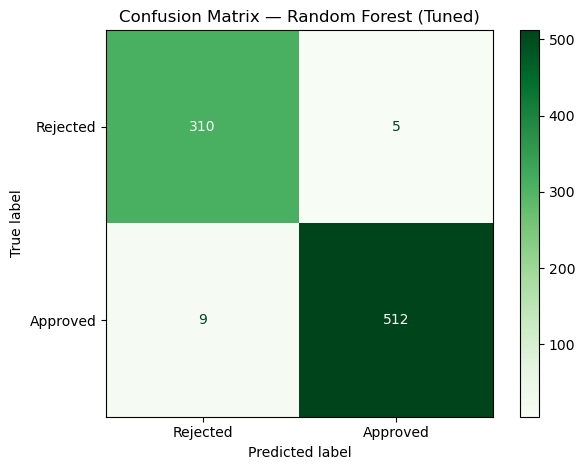

In [58]:
y_pred_t = best_rf.predict(X_test)
y_proba_t = best_rf.predict_proba(X_test)[:, 1]

# metrics
print("=== Random Forest (Tuned) — Test Metrics ===")
print(classification_report(y_test, y_pred_t, target_names=["Rejected","Approved"]))
auc_t = roc_auc_score(y_test, y_proba_t)
ap_t  = average_precision_score(y_test, y_proba_t)
print(f"ROC-AUC: {auc_t:.3f} | AP: {ap_t:.3f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_t, display_labels=["Rejected","Approved"], cmap="Greens"
)
plt.title("Confusion Matrix — Random Forest (Tuned)")
plt.tight_layout(); plt.show()

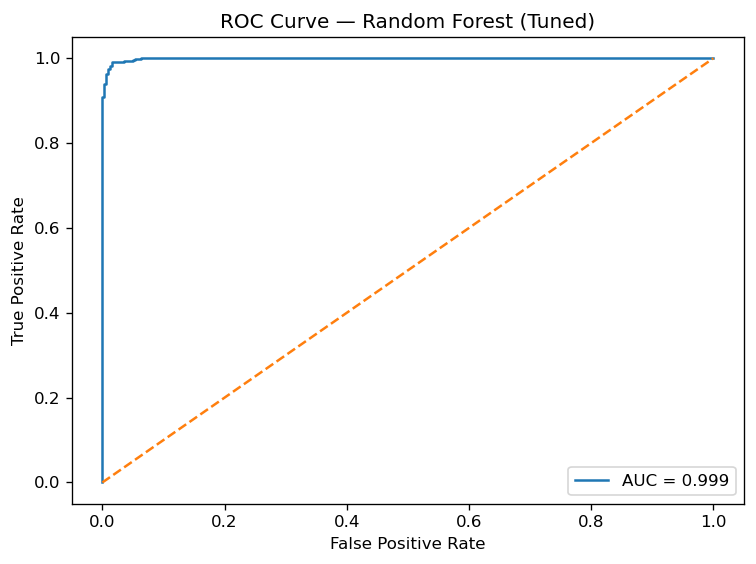

In [59]:
fpr_t, tpr_t, _ = roc_curve(y_test, y_proba_t)
plt.figure(dpi=120)
plt.plot(fpr_t, tpr_t, label=f"AUC = {auc_t:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest (Tuned)")
plt.legend(); plt.tight_layout(); plt.show()

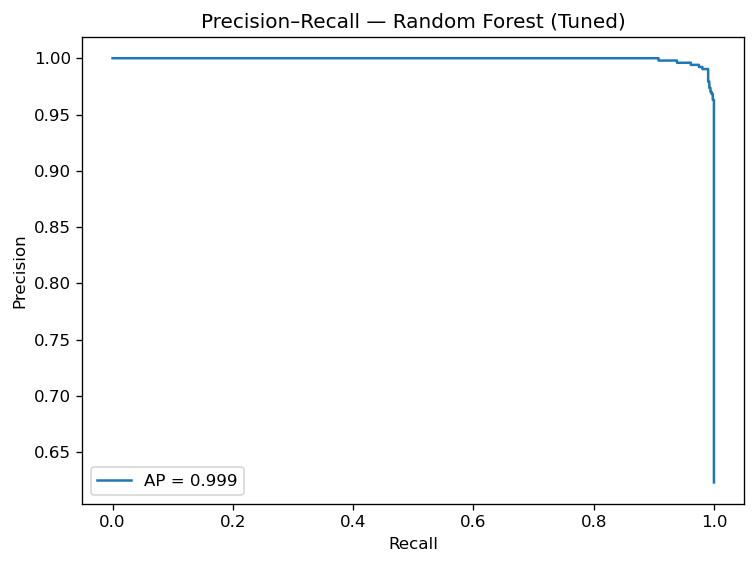

In [60]:
prec_t, rec_t, _ = precision_recall_curve(y_test, y_proba_t)
plt.figure(dpi=120)
plt.plot(rec_t, prec_t, label=f"AP = {ap_t:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision–Recall — Random Forest (Tuned)")
plt.legend(); plt.tight_layout(); plt.show()

---
## XGBoost Classifier  

**XGBoost** achieved **AUC = 0.998**, **AP = 0.999**, and **98% accuracy** with balanced precision–recall.  
 Hyperparameter tuning showed no significant improvement, so the baseline was retained.  


In [61]:
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

=== XGBoost (Baseline) — Test Metrics ===
              precision    recall  f1-score   support

    Rejected       0.97      0.97      0.97       315
    Approved       0.98      0.98      0.98       521

    accuracy                           0.98       836
   macro avg       0.97      0.98      0.97       836
weighted avg       0.98      0.98      0.98       836

ROC-AUC: 0.998 | AP: 0.999


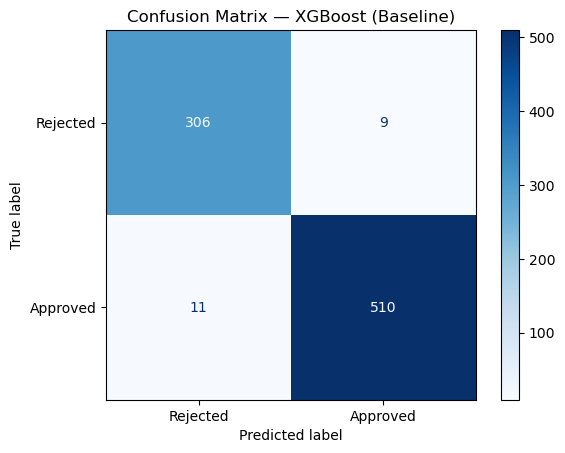

In [62]:
print("=== XGBoost (Baseline) — Test Metrics ===")
print(classification_report(y_test, y_pred, target_names=["Rejected", "Approved"]))

auc_val = roc_auc_score(y_test, y_proba)
ap_val = average_precision_score(y_test, y_proba)
print(f"ROC-AUC: {auc_val:.3f} | AP: {ap_val:.3f}")

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=["Rejected", "Approved"], cmap="Blues"
)
plt.title("Confusion Matrix — XGBoost (Baseline)")
plt.show()


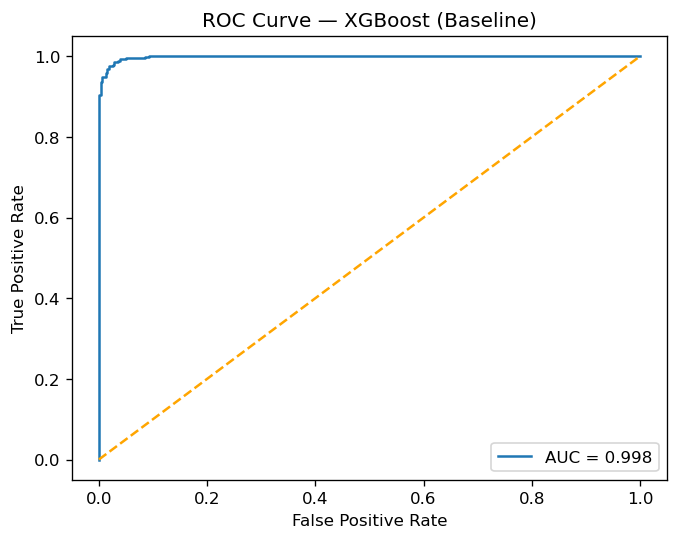

In [63]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(dpi=120)
plt.plot(fpr, tpr, label=f"AUC = {auc_val:.3f}")
plt.plot([0,1], [0,1], "--", color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — XGBoost (Baseline)")
plt.legend()
plt.show()

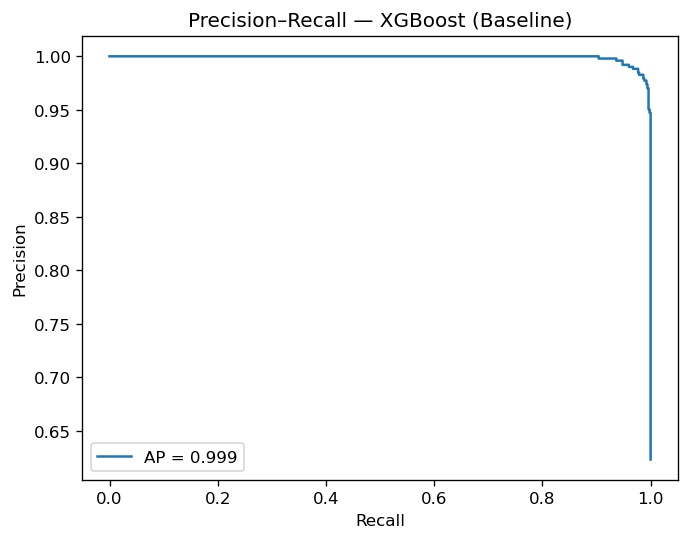

In [64]:
prec, rec, _ = precision_recall_curve(y_test, y_proba)

plt.figure(dpi=120)
plt.plot(rec, prec, label=f"AP = {ap_val:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall — XGBoost (Baseline)")
plt.legend()
plt.show()

---
## 📊 Model Comparison

Below is a summary of model performances on the **Loan Approval Prediction** task:

| Model                  | Accuracy | AUC   | AP    | Notes |
|-------------------------|----------|-------|-------|-------|
| Logistic Regression     | 0.91     | 0.959 | 0.975 | Good baseline, interpretable but weaker overall |
| Logistic Regression + SMOTE | 0.90 | 0.958 | 0.976 | Balanced classes, but no improvement |
| Decision Tree (Baseline) | 0.96    | 0.995 | 0.995 | High performance, prone to overfitting |
| Decision Tree (Tuned)   | 0.95     | 0.994 | 0.994 | Slightly lower than baseline |
| Random Forest (Baseline)| 0.98     | 0.998 | 0.999 | Excellent, robust model |
| Random Forest (Tuned)   | 0.98     | 0.999 | 0.999 | Best results, very stable |
| XGBoost (Baseline)      | 0.98     | 0.998 | 0.999 | Similar to RF, more complex |
| XGBoost (Tuned)         | 0.98     | 0.998 | 0.999 | No clear improvement |


### 📝 Notes
- **Logistic Regression**: Simple, interpretable, but weaker performance.  
- **Decision Tree**: Strong but less stable (risk of overfitting).  
- **Random Forest**: Best balance of accuracy, stability, and interpretability.  
- **XGBoost**: Comparable to RF, but higher computational cost.  


---
## Model Saving & Deployment

The best-performing model has been saved locally as a `.pkl` file using **Joblib**.  


In [65]:
import joblib

# Save XGBoost model
joblib.dump(xgb_model, "best_xgboost_model.pkl")

# Save Random Forest model
joblib.dump(best_rf, "best_random_forest_model.pkl")

print("Models saved: best_xgboost_model.pkl, best_random_forest_model.pkl")


Models saved: best_xgboost_model.pkl, best_random_forest_model.pkl
